In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

Text(0, 0.5, 'P(X = x)')

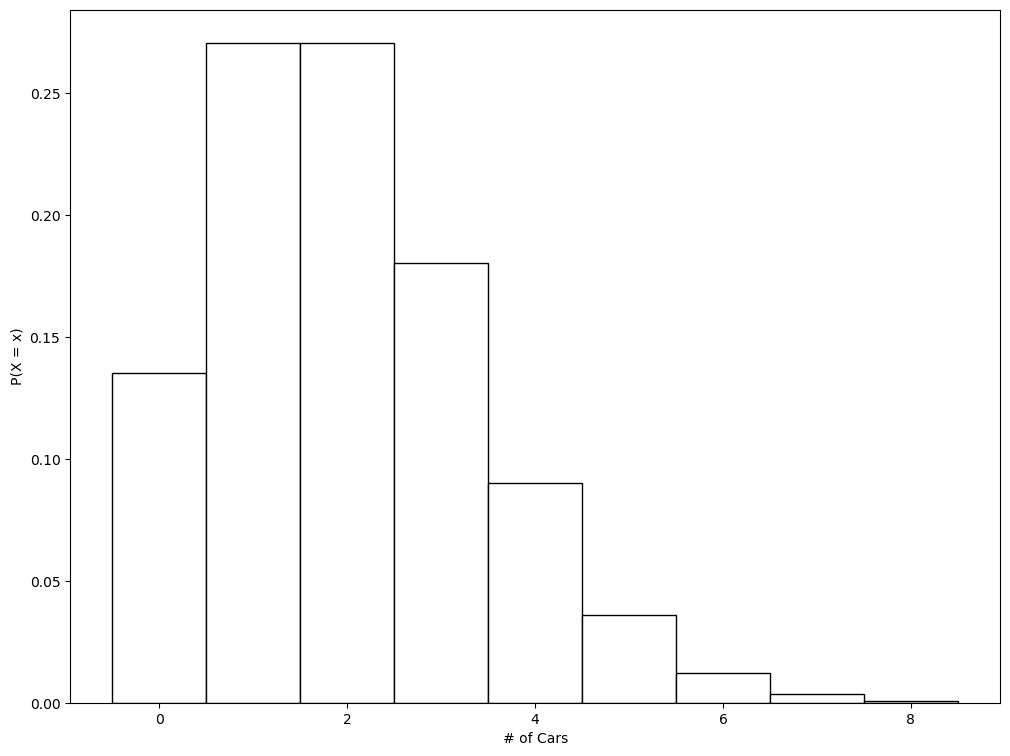

In [2]:
# 1

dist = stats.poisson(2)

x = [0, 1, 2, 3, 4, 5, 6, 7, 8]
y = dist.pmf(x)

plt.bar(x, y, color='white', edgecolor='black', width=1)
plt.xlabel('# of Cars')
plt.ylabel('P(X = x)')

In [3]:
theory = dist.pmf(0)
simulated = (dist.rvs(10_000) == 0).mean()

theory, simulated

(0.1353352832366127, 0.141)

In [4]:
theory = dist.sf(2)
simulated = (dist.rvs(10_000) >= 3).mean()

theory, simulated

(0.32332358381693654, 0.3267)

In [5]:
theory = dist.sf(0)
simulated = (dist.rvs(10_000) > 0).mean()

theory, simulated

(0.8646647167633873, 0.8672)

In [28]:
np.quantile(gpa_sims, .95)

3.4930255087307533

In [30]:
np.percentile(gpa_sims, 95)

3.4930255087307533

In [35]:
s = pd.Series(gpa_sims)
s.quantile(.95)

3.4930255087307533

In [6]:
# 2

gpa_sims = np.random.normal(3, .3, 10_000)

# top 5%
theory = stats.norm(3.0, .3).isf(.05)
simulated = np.percentile(gpa_sims, 95)

theory, simulated

(3.4934560880854417, 3.4930255087307533)

In [7]:
theory = stats.norm(3.0, .3).ppf(.15)
simulated = np.percentile(gpa_sims, 15)

theory, simulated

(2.689069983151863, 2.6938796587706633)

In [8]:
theory = stats.norm(3.0, .3).ppf([.2, .3])
simulated = np.percentile(gpa_sims, [20, 30])

theory, simulated

(array([2.74751363, 2.84267985]), array([2.75280131, 2.84413813]))

In [9]:
theory = stats.norm(3.0, .3).cdf(3.5)
simulated = (gpa_sims <= 3.5).mean()

theory, simulated

(0.9522096477271853, 0.9523)

<BarContainer object of 100 artists>

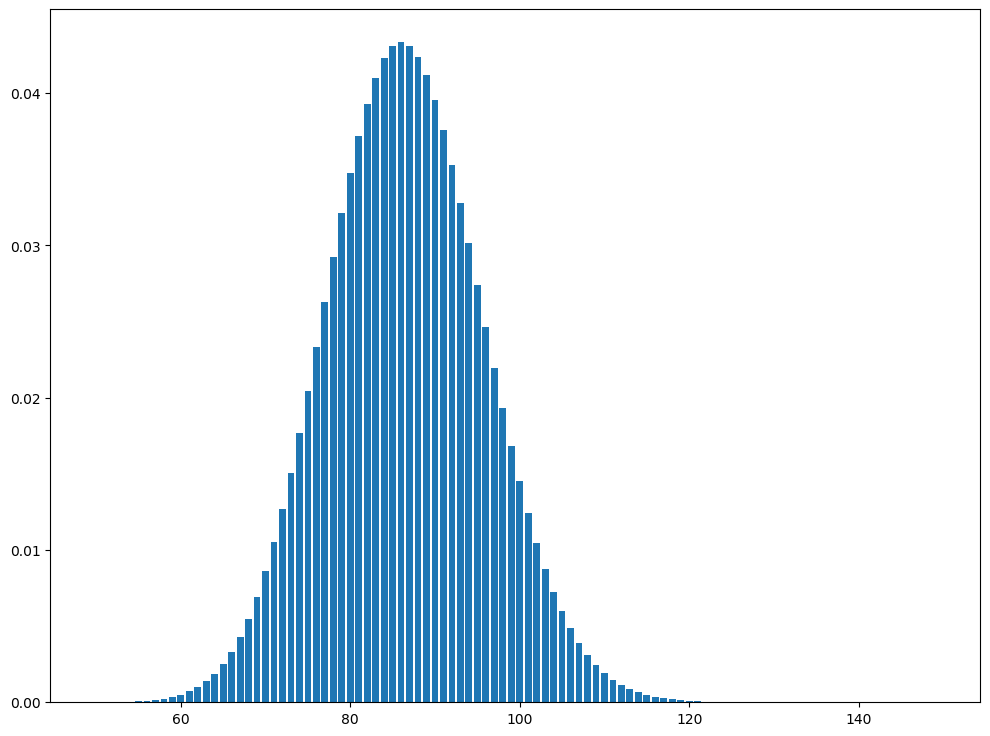

In [10]:
# 3

x = np.arange(50, 150)
y = stats.binom(4326, .02).pmf(x)

plt.bar(x, y)

In [42]:
np.random.random((10_000, 4326)) <= .02

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [43]:
(np.random.random((10_000, 4326)) <= .02).sum(axis=1)

array([ 82,  90,  95, ...,  89,  96, 104])

In [44]:
stats.binom(4326, .02).rvs(10_000)

array([72, 94, 79, ..., 89, 83, 90])

In [11]:
theory = stats.binom(4326, .02).sf(96)
simulated = ((np.random.random((10_000, 4326)) <= .02).sum(axis=1) >= 97).mean()

theory, simulated

(0.1397582363130086, 0.1396)

In [73]:
stats.poisson(4326 * .02).sf(96)

0.14211867659283192

In [ ]:
.95, .12, .45, .16

<BarContainer object of 5 artists>

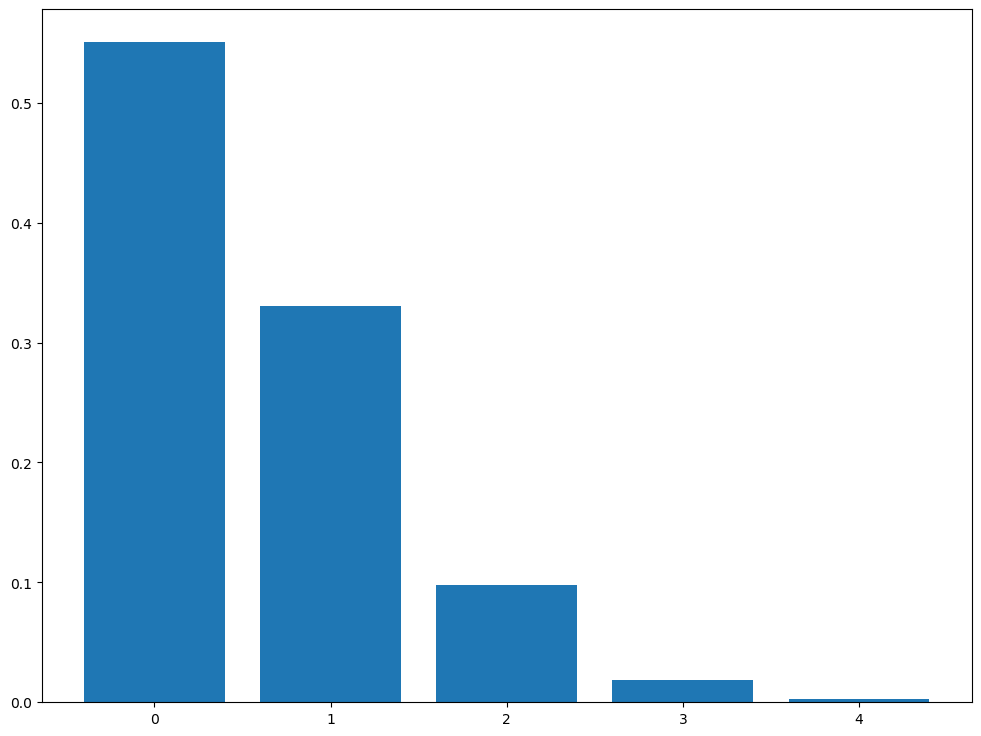

In [46]:
# 4

x = np.arange(0, 5)
y = stats.binom(60, 1 / 101).pmf(x)

plt.bar(x, y)

In [50]:
stats.binom(60, .01).sf(0)

0.4528433576092388

In [51]:
1 - stats.binom(60, .01).pmf(0)

0.45284335760923855

In [13]:
simulated = ((np.random.random((10_000, 60)) <= .01).sum(axis=1) > 0).mean()
theory = stats.binom(60, .01).sf(0)

theory, simulated

(0.4528433576092388, 0.4435)

In [57]:
# 5

n_students = round(.9 * 3 * 22)
p = .03

p_cleaned = stats.binom(n_students, p).sf(0)
p_cleaned

0.8342199288437355

In [52]:
stats.binom(n_students, p).pmf(1)

0.3025059030377137

In [64]:
n_days = 5

p_cleaned * p_cleaned * p_cleaned * p_cleaned * p_cleaned
p_cleaned ** n_days

0.404019942874891

In [66]:
stats.binom(5, p_cleaned).sf(4)

0.404019942874891

In [67]:
p_not_cleaned = 1 - p_cleaned

In [68]:
p_not_cleaned * p_not_cleaned

0.027483031992576113

In [70]:
1 - stats.binom(n_students * 2, p).sf(0)

0.02748303199257618

In [72]:
stats.binom(n_students * 2, p).pmf(0)

0.02748303199257623